# Iris Flower Classification Using KNN

- Dataset is Obtained from [Kaggle](https://www.kaggle.com/arshid/iris-flower-dataset)

## 1 - Imports 

In [235]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 2 - Read File 

In [236]:
df = pd.read_csv('IRIS.csv')

In [237]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [238]:
df['species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [239]:
df['species'].replace({'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2}, inplace=True)

In [240]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


## 3 - Scale the Data

In [241]:
from sklearn.preprocessing import StandardScaler

In [242]:
scaler = StandardScaler()

In [243]:
# Fit all the features but not the label
scaler.fit(df.drop('species',axis=1))

StandardScaler()

In [244]:
# Transforms all the features but not the label
scaled_features = scaler.transform(df.drop('species',axis=1))

In [245]:
# Create a dataframe from the scaled features for visualizing the data
df_feat = pd.DataFrame(scaled_features,columns=df.columns[:-1])
df_feat.head()

,sepal_length,sepal_width,petal_length,petal_width
0,-0.900681,1.032057,-1.341272,-1.312977
1,-1.143017,-0.124958,-1.341272,-1.312977
2,-1.385353,0.337848,-1.398138,-1.312977
3,-1.506521,0.106445,-1.284407,-1.312977
4,-1.021849,1.263460,-1.341272,-1.312977


## 4 - Split the Data

In [246]:
X = scaled_features
y = df['species']

In [247]:
from sklearn.model_selection import train_test_split

In [248]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

## 5 - Train the model

In [249]:
from sklearn.neighbors import KNeighborsClassifier

In [250]:
knn = KNeighborsClassifier(n_neighbors=1)

In [251]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [252]:
pred = knn.predict(X_test)

## 6 - Evaluate the Model 

In [253]:
from sklearn.metrics import classification_report,confusion_matrix

In [254]:
print(confusion_matrix(y_test,pred))

[[14  0  0]
 [ 0 11  0]
 [ 0  2 18]]


In [255]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       0.85      1.00      0.92        11
           2       1.00      0.90      0.95        20

    accuracy                           0.96        45
   macro avg       0.95      0.97      0.95        45
weighted avg       0.96      0.96      0.96        45



## 7 - Check the error rate at different K values

In [256]:
error_rate = []

# Will take some time
for i in range(1,50):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

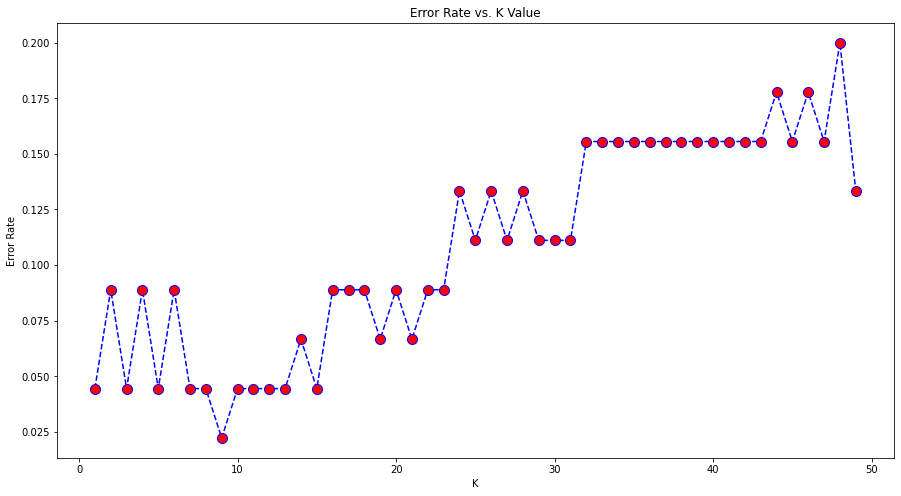

In [257]:
# Visualize the error rate
plt.figure(figsize=(15,8))
plt.plot(range(1,50),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

## 8 - Identify the lowest error rate and modify the model

In [258]:
lowest_error_index = error_rate.index(min(error_rate))+1
print('Minimum Error Rate: ' + str(min(error_rate)))
print('Index position of Minimum Error Rate: ' + str(lowest_error_index))

Minimum Error Rate: 0.022222222222222223
Index position of Minimum Error Rate: 9


In [259]:
# Now with lowest_error_index
knn = KNeighborsClassifier(n_neighbors=lowest_error_index)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('WITH K = ' + str(lowest_error_index))
print('\n')
print('Confusion Matrix:')
print(confusion_matrix(y_test,pred))
print('\n')
print('Classification Report:')
print(classification_report(y_test,pred))

WITH K = 9


Confusion Matrix:
[[14  0  0]
 [ 0 11  0]
 [ 0  1 19]]


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       0.92      1.00      0.96        11
           2       1.00      0.95      0.97        20

    accuracy                           0.98        45
   macro avg       0.97      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



## 9 - Test a sample

In [298]:
flower_type = {0:'Iris-setosa', 1:'Iris-versicolor', 2:'Iris-virginica'}

flower_index = 7

y_test_np = np.array(y_test)

print(f'Actual --> {flower_type[y_test_np[flower_index]]}  --  Prediction --> {flower_type[pred[flower_index]]}')

Actual --> Iris-setosa  --  Prediction --> Iris-setosa
